# **DEAP** *Distributed Evolutionary Algorithms in Python*

O **DEAP** fornece operadores genéticos prontos, como seleção, crossover e mutação, permitindo uma implementação mais **concisa e eficiente**.  

---

## 📌 Implementação com DEAP
1️⃣ **Definir indivíduos e população**  
2️⃣ **Criar operadores genéticos com DEAP**  
3️⃣ **Rodar a simulação**  

---

### 📦 Instalar DEAP (se necessário)
Caso ainda não tenha a biblioteca instalada, execute:  

```bash
pip install deap
```

---

### 📜 Parâmetros da Simulação

In [1]:
GENE_LENGTH = 16    # Número de bits por indivíduo
POP_SIZE = 20       # Tamanho da população
MUTATION_RATE = 0.8 # Probabilidade de ocorrencia de mutação
MTPB = 0.1          # Probabilidade de mutação por gene
CXPB = 0.5          # Probabilidade de crossover
GENERATIONS = 10    # Número de gerações

### 🔬 Código Usando DEAP

O código a seguir implementa exatamente o mesmo caso de uso do notebook [1-artificial-evolution-one-max](1-artificial-evolution-one-max.ipynb), porém, usando a library **deap**.

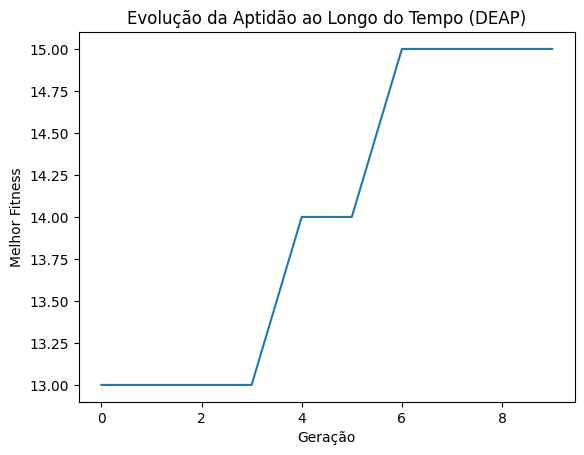

In [ ]:
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools

# Criando classe de fitness e indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizar fitness
creator.create("Individual", list, fitness=creator.FitnessMax)

# Registrando funções básicas
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)  # Gera um gene (0 ou 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, GENE_LENGTH)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Função de fitness (quantidade de '1's)
def evaluate(individual):
    return sum(individual),  # Retorna tupla

toolbox.register("mate", tools.cxOnePoint)         # Crossover de um ponto
toolbox.register("mutate", tools.mutFlipBit, indpb=MTPB)  # Mutação por bit
toolbox.register("select", tools.selTournament, tournsize=3)  # Seleção por torneio
toolbox.register("evaluate", evaluate)

# Evolução
def evolve():
    population = toolbox.population(n=POP_SIZE)
    fitness_values = []

    # Avaliação inicial
    for ind in population:
        ind.fitness.values = toolbox.evaluate(ind)

    for gen in range(GENERATIONS):
        new_population = []
        
        while len(new_population) < POP_SIZE:
            parent1 = toolbox.select(population, 1)[0]
            parent2 = toolbox.select(population, 1)[0]
            
            if random.random() < CXPB:
                child1, child2 = toolbox.mate(parent1, parent2)
                                    
                if random.random() < MUTATION_RATE:
                    child1 = toolbox.mutate(child1)[0]
                    child2 = toolbox.mutate(child2)[0]
                    
                new_population.append(creator.Individual(child1))
                new_population.append(creator.Individual(child2))
                
        for ind in new_population:
            if not ind.fitness.valid:
                ind.fitness.values = toolbox.evaluate(ind)

        # Substituir a população
        population[:] = new_population

        # Coleta de dados
        best_fitness = max(ind.fitness.values[0] for ind in population)
        fitness_values.append(best_fitness)

    return fitness_values

# Executa a simulação
best_fitness = evolve()

# Plota evolução do fitness
plt.plot(best_fitness)
plt.xlabel("Geração")
plt.ylabel("Melhor Fitness")
plt.title("Evolução da Aptidão ao Longo do Tempo (DEAP)")
plt.show()

#### 🚀 Exemplo Regular DEAP

A versão acima, reproduz exatamente a mesma sequência da implementação do notebook [1-artificial-evolution-one-max](1-artificial-evolution-one-max.ipynb). A versão abaixo segue o uso regular da biblioteca DEAP.

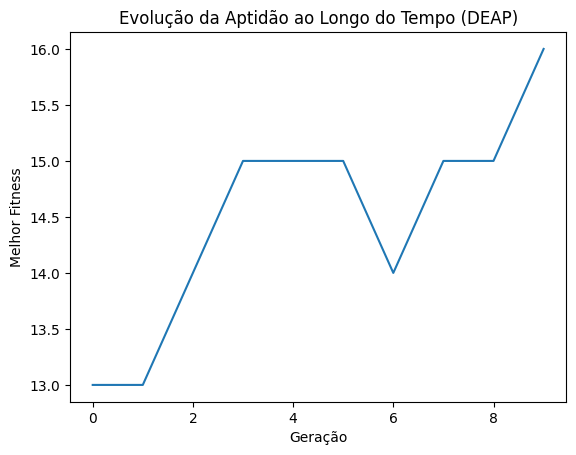

In [4]:
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools

# Criando classe de fitness e indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizar fitness
creator.create("Individual", list, fitness=creator.FitnessMax)

# Registrando funções básicas
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)  # Gera um gene (0 ou 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, GENE_LENGTH)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Função de fitness (quantidade de '1's)
def evaluate(individual):
    return sum(individual),  # Retorna tupla

toolbox.register("mate", tools.cxOnePoint)         # Crossover de um ponto
toolbox.register("mutate", tools.mutFlipBit, indpb=MTPB)  # Mutação por bit
toolbox.register("select", tools.selTournament, tournsize=3)  # Seleção por torneio
toolbox.register("evaluate", evaluate)

# Evolução
def evolve():
    population = toolbox.population(n=POP_SIZE)
    fitness_values = []

    # Avaliação inicial
    for ind in population:
        ind.fitness.values = toolbox.evaluate(ind)

    for gen in range(GENERATIONS):
        offspring = toolbox.select(population, len(population))  # Seleciona
        offspring = list(map(toolbox.clone, offspring))  # Clona indivíduos

        # Aplicando crossover
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values, child2.fitness.values

        # Aplicando mutação
        for mutant in offspring:
            if random.random() < MUTATION_RATE:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Reavaliação dos indivíduos alterados
        for ind in offspring:
            if not ind.fitness.valid:
                ind.fitness.values = toolbox.evaluate(ind)

        # Substituir a população
        population[:] = offspring

        # Coleta de dados
        best_fitness = max(ind.fitness.values[0] for ind in population)
        fitness_values.append(best_fitness)

    return fitness_values

# Executa a simulação
best_fitness = evolve()

# Plota evolução do fitness
plt.plot(best_fitness)
plt.xlabel("Geração")
plt.ylabel("Melhor Fitness")
plt.title("Evolução da Aptidão ao Longo do Tempo (DEAP)")
plt.show()

## 🔥 Diferenças e Vantagens do DEAP
✔ **Menos código**: Não precisamos implementar manualmente crossover, mutação ou seleção.  
✔ **Flexibilidade**: Fácil modificar a função de fitness e parâmetros.  
✔ **Eficiência**: O DEAP otimiza operações internas para melhor desempenho.  